In [ ]:
# display feature maps that ar outputs by convolutional and pooling layers of the network given a certain input, giving a view of how the input is decomposed into the filters learned by the network. Plotting independenlty the contents of every channel as a 2D image.

In [2]:
from keras.models import load_model
from keras.utils import load_img, img_to_array, array_to_img
import numpy as np
import matplotlib.pyplot as plt
from keras import models
import os

2022-12-02 16:37:11.871419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/francoterranova/opt/anaconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/Users/francoterranova/opt/anaconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ["dlopen(/Users/francoterranova/opt/anaconda3/lib/python3.9/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so, 0x0006): symbol not found in flat namespace '__ZN3tsl2io7DirnameENSt3__117basic_string_viewIcNS1_11char_traitsIcEEEE'"]
  warnings.warn(f"unable to load libtensorflow_io_pl

In [20]:
model = load_model(os.path.join("..","models","CNN_baseline.h5"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 135, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 240, 135, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 67, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 67, 64)       18496     
                                                                 
 batch_normalization_1 (Batc  (None, 120, 67, 64)      256       
 hNormalization)                                                 
                                                        

(1, 240, 135, 3)


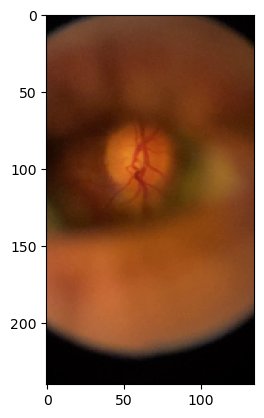

In [22]:
img_path = os.path.join('..','workspace', 'images', 'test','SANS-B2.2022.01.27.11.26.OD.MP4_5.jpg')
# select an image not used for training
input_height = int(1920/8)
input_width = int(1080/8)

img = load_img(img_path, target_size=(input_height, input_width))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
plt.imshow(img_tensor[0])
plt.show()

In [23]:
num_layers = 6 # extract the outputs of the top num_layers layers
layer_outputs = [layer.output for layer in model.layers[:num_layers]]
# creates a model thaat will return these outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [24]:
# return one array per laayer activation
activations = activation_model.predict(img_tensor)

1/1 [==============================] - 0s 135ms/step


(1, 240, 135, 32)


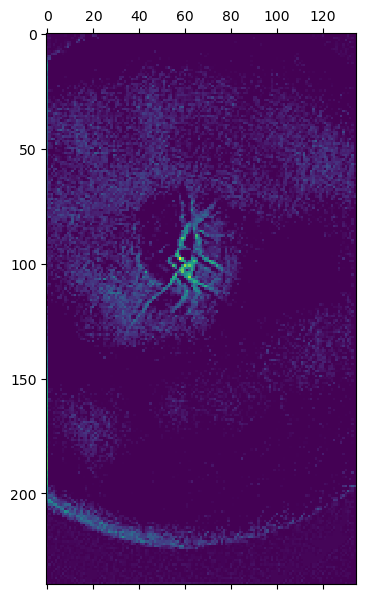

In [25]:
# e.g. first layer activation, predefined channel
first_layer_activation = activations[0]
channel_to_plot = 2
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, channel_to_plot], cmap='viridis')
# every channel is going to encode a different feature

In [26]:
layer_names = []
for layer in model.layers[0:num_layers]:
    print(layer)
    if 'conv' in layer.name or 'max' in layer.name:
        layer_names.append(layer.name)

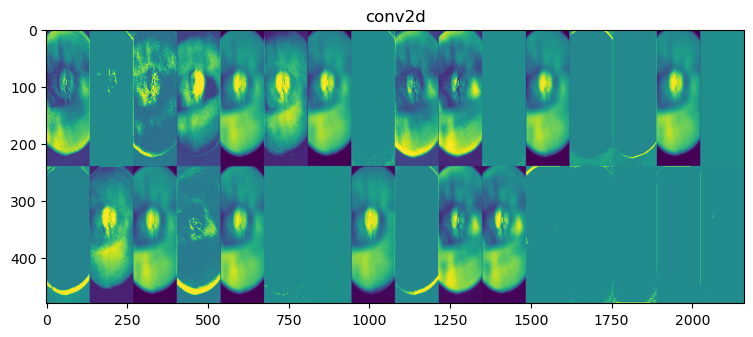

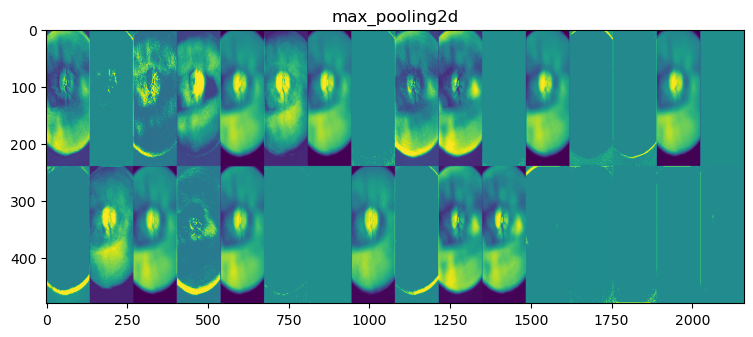

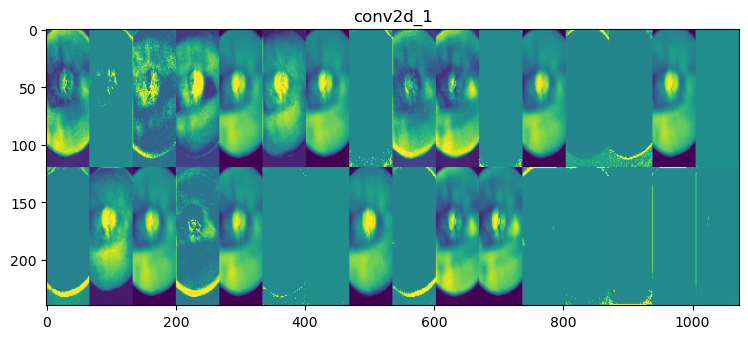

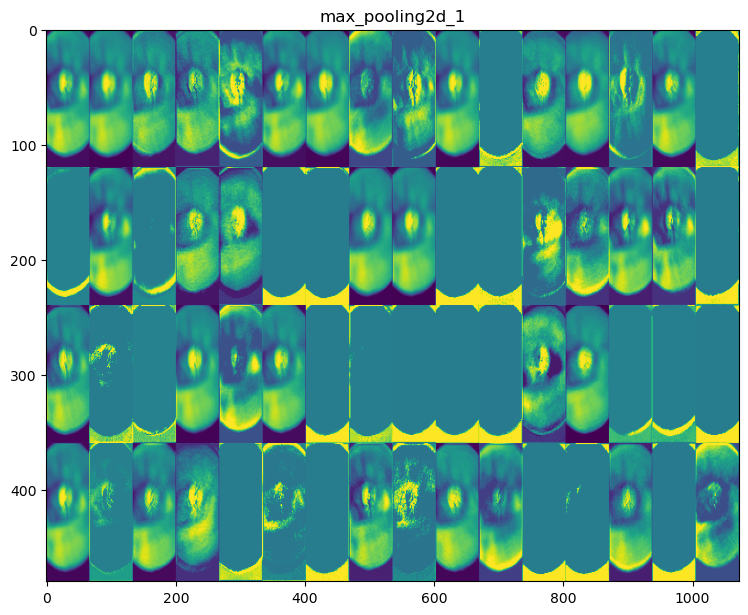

In [34]:
import time
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1] # number of features in the feature map
    size1 = layer_activation.shape[1]
    size2 = layer_activation.shape[2]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size1 * n_cols, images_per_row * size2))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size1 : (col + 1) * size1, row * size2 : (row + 1) * size2] = channel_image
    plt.figure(figsize=(1. /size1*display_grid.shape[1], 1. /size2*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')